# TASK 1

In [ ]:
!pip install opencv-python-headless

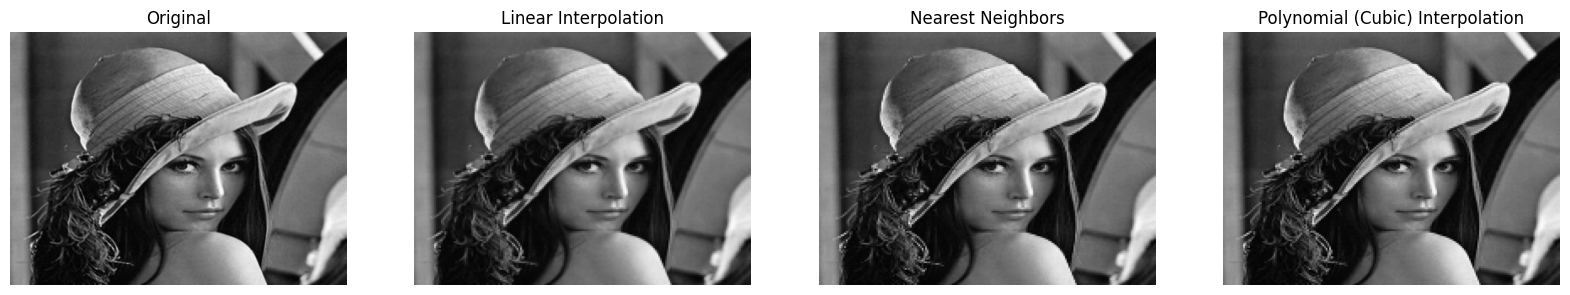

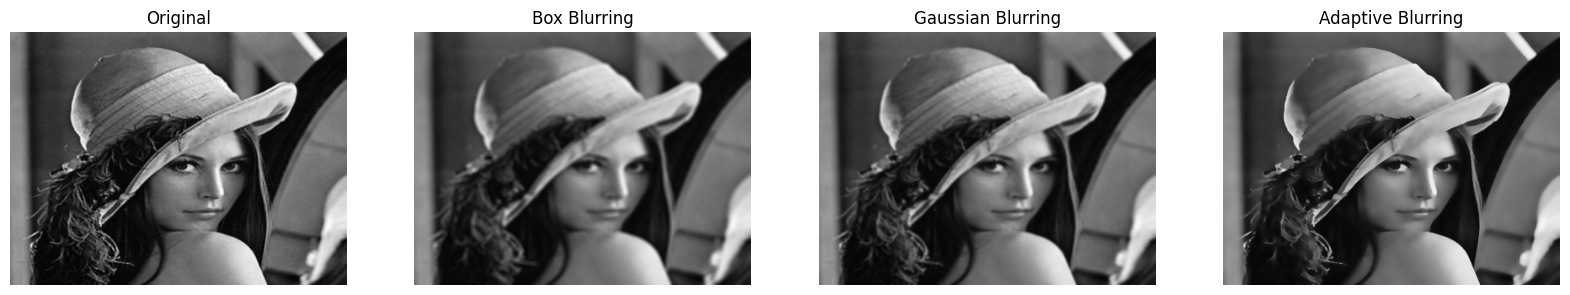

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def show_images(images, titles, cmap='viridis', figsize=(20, 10)):
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) if len(img.shape) == 3 else img, cmap=cmap)
        plt.title(title)
        plt.axis('off')
    plt.show()
image_path = "/content/PIC 1.jpg"
image = cv2.imread(image_path)
original = cv2.resize(image, (400, 300))
resize_linear = cv2.resize(original, (200, 150), interpolation=cv2.INTER_LINEAR)
resize_nearest = cv2.resize(original, (200, 150), interpolation=cv2.INTER_NEAREST)
resize_polynomial = cv2.resize(original, (200, 150), interpolation=cv2.INTER_CUBIC)
show_images(
    [original, resize_linear, resize_nearest, resize_polynomial],
    ["Original", "Linear Interpolation", "Nearest Neighbors", "Polynomial (Cubic) Interpolation"]
)
box_blur = cv2.blur(original, (5, 5))
gaussian_blur = cv2.GaussianBlur(original, (5, 5), 0)
adaptive_blur = cv2.bilateralFilter(original, 9, 75, 75)
show_images(
    [original, box_blur, gaussian_blur, adaptive_blur],
    ["Original", "Box Blurring", "Gaussian Blurring", "Adaptive Blurring"]
)

# TASK 2

100%|██████████| 22.0M/22.0M [00:00<00:00, 52.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1
Files in dataset directory: ['train-images-idx3-ubyte', 'train-labels-idx1-ubyte', 't10k-labels.idx1-ubyte', 't10k-images.idx3-ubyte', 'train-labels.idx1-ubyte', 't10k-labels-idx1-ubyte', 't10k-images-idx3-ubyte', 'train-images.idx3-ubyte']
--- Naive Bayes Results ---
Accuracy: 0.5563
Precision: 0.6933
Recall: 0.5563
F1-Score: 0.5186
Confusion Matrix:
[[ 873    0    3    5    2    5   31    0   31   30]
 [   0 1082    2    1    0    0   10    0   35    5]
 [  77   25  291   80    5    1  262    4  267   20]
 [  34   39    6  357    1    3   54    8  395  113]
 [  22    2    6    4  167    9   66    7  196  503]
 [  77   24    2   21    2   48   40    2  574  102]
 [  12   12    5    1    1    6  894    0   26    1]
 [   0   15    2    9    6    1    5  267   42  681]
 [  14   74    3    8    4   13   14    3  627  214]
 [   4    7    3    6    0    0    1   12   19  957]]


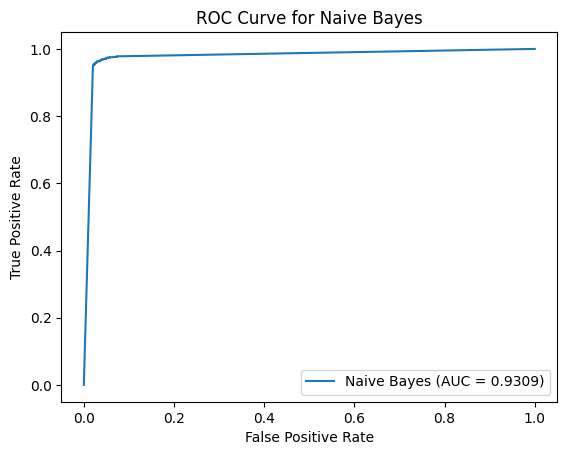

--- Random Forest Results ---
Accuracy: 0.9687
Precision: 0.9687
Recall: 0.9687
F1-Score: 0.9687
Confusion Matrix:
[[ 971    0    1    0    0    2    2    1    3    0]
 [   0 1123    3    2    0    2    2    1    2    0]
 [   6    0  998    3    4    0    4    8    9    0]
 [   0    0   13  971    0    5    0    9   10    2]
 [   1    0    3    0  956    0    4    0    2   16]
 [   4    0    1   11    3  857    7    1    4    4]
 [   8    3    0    0    2    4  938    0    3    0]
 [   1    3   19    4    1    0    0  985    4   11]
 [   3    0    2   13    5    4    2    4  931   10]
 [   5    6    4   10   13    3    2    5    4  957]]


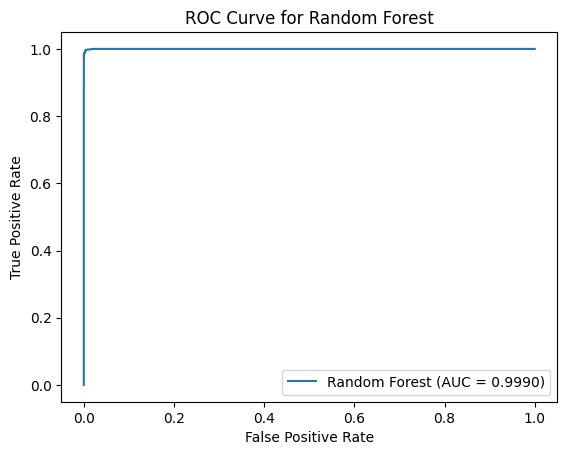

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, roc_auc_score
)
from struct import unpack
import os
import kagglehub
dataset_name = "hojjatk/mnist-dataset"
path = kagglehub.dataset_download(dataset_name)
print("Path to dataset files:", path)
print("Files in dataset directory:", os.listdir(path))
train_images_path = os.path.join(path, "train-images-idx3-ubyte", "train-images-idx3-ubyte")
train_labels_path = os.path.join(path, "train-labels-idx1-ubyte", "train-labels-idx1-ubyte")
test_images_path = os.path.join(path, "t10k-images-idx3-ubyte", "t10k-images-idx3-ubyte")
test_labels_path = os.path.join(path, "t10k-labels-idx1-ubyte", "t10k-labels-idx1-ubyte")
def load_idx(file_path):
    with open(file_path, 'rb') as f:
        magic, size = unpack('>II', f.read(8))
        if magic == 2051:
            rows, cols = unpack('>II', f.read(8))
            data = np.fromfile(f, dtype=np.uint8).reshape(size, rows * cols)
        elif magic == 2049:
            data = np.fromfile(f, dtype=np.uint8)
        else:
            raise ValueError(f"Unknown magic number {magic} in file {file_path}")
    return data
X_train_full = load_idx(train_images_path) / 255.0
y_train_full = load_idx(train_labels_path)
X_test = load_idx(test_images_path) / 255.0
y_test = load_idx(test_labels_path)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)
models = {
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}
def evaluate_model(model, X_train, y_train, X_test, y_test):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    y_pred_cv = cross_val_predict(model, X_train, y_train, cv=skf, method="predict")
    y_prob_cv = cross_val_predict(model, X_train, y_train, cv=skf, method="predict_proba") if hasattr(model, "predict_proba") else None
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_prob_test = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None
    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test, average="weighted")
    recall = recall_score(y_test, y_pred_test, average="weighted")
    f1 = f1_score(y_test, y_pred_test, average="weighted")
    cm = confusion_matrix(y_test, y_pred_test)
    if y_prob_test is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob_test[:, 1], pos_label=1)
        roc_auc = roc_auc_score(y_test, y_prob_test, multi_class='ovr')
    else:
        fpr, tpr, roc_auc = None, None, None
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "confusion_matrix": cm,
        "roc_curve": (fpr, tpr) if fpr is not None else None,
        "roc_auc": roc_auc
    }
for model_name, model in models.items():
    results = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"--- {model_name} Results ---")
    print(f"Accuracy: {results['accuracy']:.4f}")
    print(f"Precision: {results['precision']:.4f}")
    print(f"Recall: {results['recall']:.4f}")
    print(f"F1-Score: {results['f1']:.4f}")
    print(f"Confusion Matrix:\n{results['confusion_matrix']}")
    if results["roc_curve"]:
        fpr, tpr = results["roc_curve"]
        plt.figure()
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {results['roc_auc']:.4f})")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve for {model_name}")
        plt.legend(loc="best")
        plt.show()